# Regression Project

**Author:** Jim He (jh393@uw.edu)

**Date:** January 19, 2026

# Part 1: Fuel Consumption -> Hoursepower Prediction


**Dataset:** `FuelEconomy.csv`  
**Task:** Predict vehicle horsepower using regression  
**Models:**  
- Linear Regression  
- Polynomial Regression (degree 2, 3, 4)  
**Regularization:** **Not used** (as requested)

---

## Content

### 1.1 Load and Inspect the Dataset
- Load CSV into pandas DataFrame
- Display column names, shape, and `describe()`
- Identify and handle missing values

### 1.2  Train/Test Split (70% / 30%)
- Random split with fixed `random_state` for reproducibility

### 1.3 Model Training: Linear + Polynomial Regression
- Train the following models to predict HP:
  - Linear Rergression
  - Polynomial Regression (degree 2)
  - Polynomial Regression (degree 3)
  - Polynomial Regression (degree 4)

### 1.4 Model Evaluation Metrics (Train & Test)
- For each model, we report:
  - Mean Squared Error (**MSE**)
  - Mean Absolute Error (**MAE**)
  - Coefficient of Determination (**R²**)
- Then present results in a comparison table

### 1.5 Discussion and Interpretation
- Which model performs best on the test set? Why?
- Does increasing polynomial degree always improve performance?
- Explain any poor performance (underfitting, overfitting, outliers, weak feature-target relationship)
- Support claims with reported metrics

In [ ]:

# ============================================================
# Imports Libraries
# ============================================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt


## 1.1 Load and inspect the dataset

In this section, we load the dataset into a pandas DataFrame and perform a **basic sanity check** before building any models.

### What this code does
- **Loads the CSV file** into a pandas DataFrame (`df`)
- Prints the **shape** of the dataset:
  - number of rows = number of samples (vehicles)
  - number of columns = number of features (variables - HP and Fuel Economy)
- Prints the **column names** to understand what information is available
- Displays the **first few rows** using `head()` to preview the data format and values
- Shows **summary statistics** using `describe()`:
  - for numeric columns: mean, standard deviation, min/max, quartiles, etc.
  - for non-numeric columns: count, unique values, most common value, etc.
- Checks for **missing values** in each column

### Why this matters
Machine learning models depend heavily on clean and well-structured data.  
Before training any regression model, we must confirm:
- the target column exists (here: **Performance Index**)
- columns have reasonable values and types
- there are no unexpected missing values that could break model training


In [ ]:

# ============================================================
# Load dataset
# ============================================================

DATA_PATH = "FuelEconomy.csv"
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

display(df.head())

print("\nSummary statistics:")
display(df.describe(include="all"))

print("\nMissing values per column:")
display(df.isna().sum())


Shape: (100, 2)

Columns:
['Horse Power', 'Fuel Economy (MPG)']


,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739



Summary statistics:


,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000



Missing values per column:


,0
Horse Power,0
Fuel Economy (MPG),0


## 1.2 Generic Train/Test Split & Utility functions

In below, we may run **multiple regression experiments** (dropping a feature, splitting by groups, one-hot encoding, etc.).  
To keep our notebook clean and avoid copy-pasting the same code many times, we define a few **helper functions**.

These functions handle the most common steps in any supervised learning workflow:
1. Preparing features **X** and target **y**
2. Splitting data into **train** and **test**
3. Training linear and polynomial regression models
4. Computing evaluation metrics
5. Visualizing predicted vs actual values on the test set
6. Printing a simplified version of the learned regression equation

---

### What each function does

- **`prepare_xy(df_in)`**  
  Removes rows with missing values and splits the dataset into:
  - **X** = input features (all columns except the target)  
  - **y** = target variable (here: `Performance Index`)

- **`split_data(X, y)`**  
  Performs a **70% / 30% train-test split** using a fixed `random_state` so that results are reproducible.

- **`compute_metrics(y_true, y_pred)`**  
  Computes three standard regression evaluation metrics:
  - **MSE (Mean Squared Error):** penalizes large errors more strongly  
  - **MAE (Mean Absolute Error):** average absolute prediction error  
  - **R² (Coefficient of Determination):** measures how well the model explains the variance in the data

- **`print_fitted_equation(...)`**  
  Prints the fitted regression model equation using the learned coefficients.  
  For polynomial regression, the number of terms can become very large, so the notebook prints only the **top terms** with the largest coefficient magnitude.

- **`plot_actual_vs_predicted_test(...)`**  
  Creates a scatter plot for the **test set** showing:
  - **Actual values** (blue circles)
  - **Predicted values** (red x’s)  
  This helps visually compare how close the predictions are to real values.

- **`run_models_and_evaluate(...)`**  
  This is the main driver function that runs everything for a given scenario:
  - Trains **Linear Regression** and **Polynomial Regression (degrees 2, 3, 4)**
  - Evaluates **train and test** performance using MSE, MAE, and R²
  - Prints fitted equation (top terms)
  - Generates test-set scatter plots
  - Returns a clean results table for easy comparison

---

✅ After this section, the rest of the notebook becomes much shorter and easier to read, because each scenario can reuse these helper functions.




In [ ]:
# ============================================================
# Train/Test Data Split & Generic Utility functions
# ============================================================

TARGET_COL = "Horse Power"

def prepare_xy(target_col=TARGET_COL):
    """Drop missing rows, split into X and y."""
    df_clean = df.dropna().copy()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    return X, y

def split_data(X, y, test_size=0.30, random_state=42):
    """70/30 random train-test split."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def compute_metrics(y_true, y_pred):
    """Return MSE, MAE, R^2."""
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R^2": r2_score(y_true, y_pred),
    }

def _get_linear_parts(model, input_feature_names):
    """Extract (intercept, coefficients, feature_names) from either:
       - LinearRegression
       - Pipeline(PolynomialFeatures -> LinearRegression)
    """
    if isinstance(model, LinearRegression):
        intercept = float(model.intercept_)
        coefs = np.array(model.coef_).ravel()
        feat_names = np.array(list(input_feature_names))
        return intercept, coefs, feat_names

    if hasattr(model, "named_steps") and "poly" in model.named_steps and "lr" in model.named_steps:
        poly = model.named_steps["poly"]
        lr = model.named_steps["lr"]
        feat_names = poly.get_feature_names_out(input_features=list(input_feature_names))
        intercept = float(lr.intercept_)
        coefs = np.array(lr.coef_).ravel()
        return intercept, coefs, np.array(feat_names)

    raise ValueError("Unsupported model type for equation printing.")

def print_fitted_equation(model, input_feature_names, target_name=TARGET_COL, top_k_terms=15):
    """Print a readable fitted equation."""
    intercept, coefs, feat_names = _get_linear_parts(model, input_feature_names)

    order = np.argsort(np.abs(coefs))[::-1]
    order = order[:min(top_k_terms, len(coefs))]

    terms = []
    for idx in order:
        terms.append(f"({coefs[idx]:+.4f}) * {feat_names[idx]}")

    eq = f"{target_name} = {intercept:.4f} " + " ".join(terms)

    print("\n--- Fitted Model Equation (Top Terms) ---")
    print(eq)
    if len(coefs) > top_k_terms:
        print(f"(Showing top {top_k_terms} terms out of {len(coefs)} total terms.)")

def plot_actual_vs_predicted_test(y_test, y_pred, title, target_name=TARGET_COL, max_points=300):
    """Scatter plot of Actual vs Predicted values on the TEST set."""
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)

    n = len(y_test)
    if n > max_points:
        rng = np.random.default_rng(0)
        sel = rng.choice(n, size=max_points, replace=False)
        y_test = y_test[sel]
        y_pred = y_pred[sel]

    x = np.arange(len(y_test))

    plt.figure(figsize=(12, 4))
    plt.scatter(x, y_test, marker="o", alpha=0.8, label="Actual (Test)")
    plt.scatter(x, y_pred, marker="x", alpha=0.8, label="Predicted (Test)")
    plt.title(title)
    plt.xlabel("Test sample index (subset)")
    plt.ylabel(target_name)
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend()
    plt.show()

def run_models_and_evaluate(degrees=(1, 2, 3, 4),
                            target_col=TARGET_COL, test_size=0.30, random_state=42,
                            show_equation=True, show_plots=True, top_k_terms=15):
    """Train/evaluate linear (deg=1) + polynomial regression models."""

    X, y = prepare_xy(target_col=target_col)
    X_train, X_test, y_train, y_test = split_data(X, y, test_size=test_size, random_state=random_state)

    rows = []

    for deg in degrees:
        if deg == 1:
            model = LinearRegression()
            model_name = "Linear Regression"
        else:
            model = Pipeline([
                ("poly", PolynomialFeatures(degree=deg, include_bias=False)),
                ("lr", LinearRegression())
            ])
            model_name = f"Polynomial Regression (degree={deg})"

        model.fit(X_train, y_train)

        yhat_train = model.predict(X_train)
        yhat_test  = model.predict(X_test)

        train_m = compute_metrics(y_train, yhat_train)
        test_m  = compute_metrics(y_test, yhat_test)

        print("\n============================================================")
        print(f"Model: {model_name}")
        print("============================================================")

        if show_equation:
            print_fitted_equation(
                model=model,
                input_feature_names=X_train.columns,
                target_name=target_col,
                top_k_terms=top_k_terms
            )

        if show_plots:
            plot_actual_vs_predicted_test(
                y_test=y_test,
                y_pred=yhat_test,
                title=f"{model_name} (Test Set: Actual vs Predicted)",
                target_name=target_col
            )

        rows.append({
            "Model": model_name,
            "Train MSE": train_m["MSE"],
            "Train MAE": train_m["MAE"],
            "Train R^2": train_m["R^2"],
            "Test MSE": test_m["MSE"],
            "Test MAE": test_m["MAE"],
            "Test R^2": test_m["R^2"],
            "Train size": len(X_train),
            "Test size": len(X_test),
        })

    return pd.DataFrame(rows)

## 1.3 Model training: Linear + Polynomial regression

### What we are testing here
We want to answer the question:

✅ **Can we predict the vehicle's fuel economy (MPG) from the vehicle's horse poower?**

This gives us a useful baseline model that uses only the **other numeric/continuous features** in the dataset.

### What the code does
- Trains and evaluates the following models using a **70% / 30% random train-test split**:
  - **Linear Regression**
  - **Polynomial Regression** (degree **2**, **3**, and **4**)
- Reports **Train and Test** metrics:
  - **MSE**, **MAE**, and **R²**
- Prints the fitted model equation (top coefficient terms)
- Plots **Actual vs Predicted** values for the **test set**

✅ The output table (`results`) will help us compare whether higher-degree polynomial models improve performance over basic linear regression.



Model: Linear Regression

--- Fitted Model Equation (Top Terms) ---
Horse Power = 500.3638 (-12.3785) * Fuel Economy (MPG)


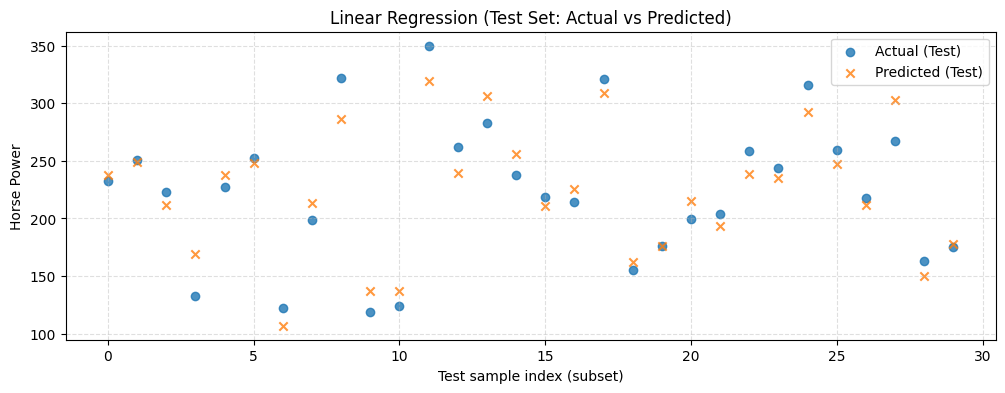


Model: Polynomial Regression (degree=2)

--- Fitted Model Equation (Top Terms) ---
Horse Power = 457.3741 (-8.5915) * Fuel Economy (MPG) (-0.0800) * Fuel Economy (MPG)^2


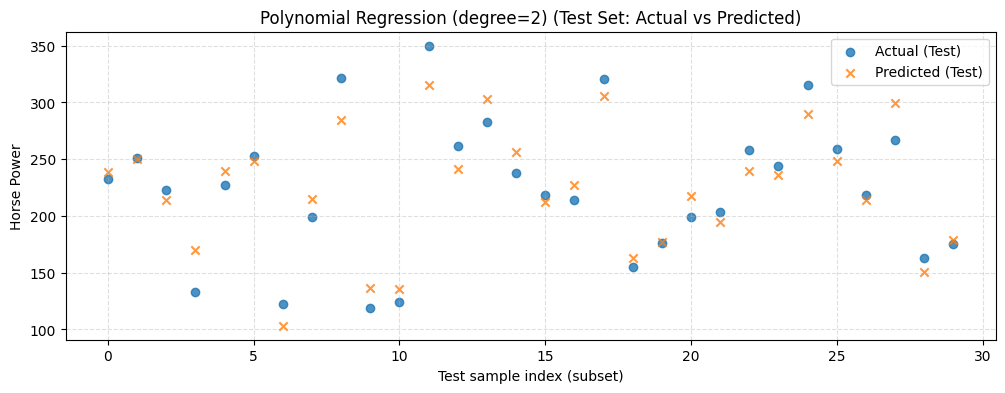


Model: Polynomial Regression (degree=3)

--- Fitted Model Equation (Top Terms) ---
Horse Power = 355.6514 (+6.0952) * Fuel Economy (MPG) (-0.7505) * Fuel Economy (MPG)^2 (+0.0097) * Fuel Economy (MPG)^3


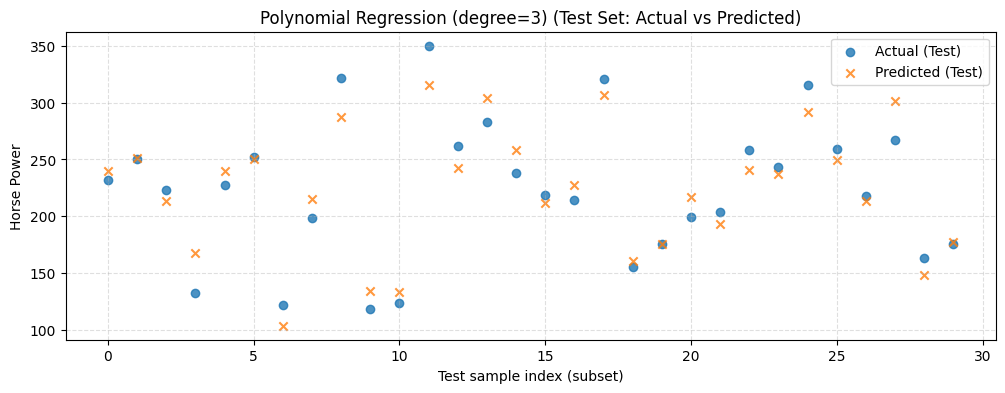


Model: Polynomial Regression (degree=4)

--- Fitted Model Equation (Top Terms) ---
Horse Power = 90.1049 (+61.1736) * Fuel Economy (MPG) (-4.7743) * Fuel Economy (MPG)^2 (+0.1339) * Fuel Economy (MPG)^3 (-0.0014) * Fuel Economy (MPG)^4


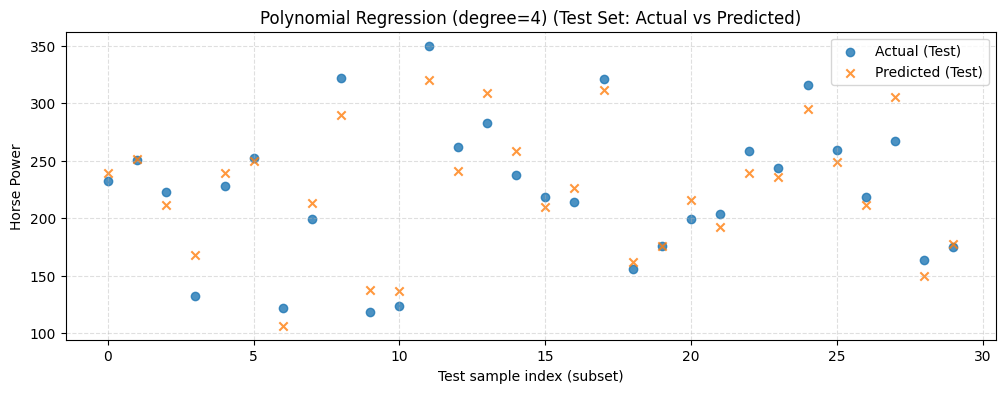

In [ ]:

# ============================================================
# Model Training
# ============================================================

results = run_models_and_evaluate(
    degrees=(1, 2, 3, 4),
    show_equation=True,
    show_plots=True,
    top_k_terms=15
)




## 1.4 Comparative Model Evaluation Table (train & test)

In [ ]:
# ============================================================
# Display results from each model in a summary table
# ============================================================

display(results)

,Model,Train MSE,Train MAE,Train R^2,Test MSE,Test MAE,Test R^2,Train size,Test size
0,Linear Regression,357.699180,16.061689,0.906320,318.561087,14.940628,0.912561,70,30
1,Polynomial Regression (degree=2),350.879731,15.995824,0.908106,331.105434,15.148330,0.909118,70,30
2,Polynomial Regression (degree=3),345.108668,15.746762,0.909618,318.404012,14.764973,0.912604,70,30
3,Polynomial Regression (degree=4),339.700171,15.508465,0.911034,313.798757,14.735471,0.913868,70,30


## 1.5 Discussion and Interpretation

We use three metrics to evaluate the performance of a model - MSE (Mean Squared Error), MAE (Mean Absolute Errir), R² (Coefficient of Determination). MSE measured the average squared differences between the predicted values and the actual values, where MSE = 0 shows the model is perfect; MAE measured the average absolute differences between the predicted values the actual values, where similarly MAE = 0 denotes a perfect model; R² measured the percentage/proportion of variance in the target variables are explained by the model, where R² = 1.0, or 100%, tells the model fits perfectly.

In this case, based on our evaluation statistics, we can see that *Polynomial Regression with Degree = 4* has the best performance, supported by its lowest *Test MSE = 313.798757*, lowest *Test MAE = 14.735471*, and highest *R² = 91.3868%*.

From our case-specific performance statistics, increasing  polynomial degree does improve performance overall, but does not guarantee performance improvement at every degree increment or linearly. The general trend of performance improvement can be justified by decreases of MSE & MAE and increase of R² when the degree was incraeses from 1 (Linear Regression Model) to 4 (Fourth Degree Polynomial Regression Model). However, it can also be seen that between degree 1 (Linear Regression Model) and degree 2 (Second Degree Polynomial Regression Model), the MSE and MAE actually went up while the R² went down. Thus, increasing the polynomial degree of the regression model **does not** always guarantee improvement in performance.

When a specific model performes unexpectedly poorl, with surprisingly high MSE & MAE and low R², in a target environment, there are chances that the data set has remarkable outliers that significantly affected the extrapolation or simply because the relationship between the independent variables (features) and the dependent variable (targeted outpus) are weak.

---

# Part 2: Weather -> Daily Electricity Consumption Prediction


**Dataset:** `electricity_consumption_based_weather_dataset.csv`  
**Task:** Predict electricity consumption using regression  
**Models:**  
- Linear Regression  
- Polynomial Regression (degree 2, 3, 4)  
**Regularization:** **Not used** (as requested)

---

## Content

### 2.1 Load and Inspect the Dataset
- Load the CSV dataset into pandas DataFrame
- Display column names, shape, and `describe()`
- Clearly identify the dependent variable: daily
consumption.
- Identify and handle missing values

### 2.2  Train/Test Split (70% / 30%)
- Randomly split into 70% training and 30% testing.
- Random split using fixed `random_state` for reproducibility

### 2.3 Model Training: Linear + Polynomial Regression
- Train the following models to predict `daily_consumption`:
  - Linear Rergression
  - Polynomial Regression (degree 2)
  - Polynomial Regression (degree 3)
  - Polynomial Regression (degree 4)

### 2.4 Model Evaluation Metrics (Train & Test)
- For each model, we report:
  - Mean Squared Error (**MSE**)
  - Mean Absolute Error (**MAE**)
  - Coefficient of Determination (**R²**)
- Then present results in a comparison table

### 2.5 Discussion and Interpretation
- Which model generalizes best (best test performance), and what does that tell you about the relationship between weather and electricity usage?
- Dopolynomial models improve the fit compared to linear regression? If yes, why might electricity consumption have nonlinear dependence on weather?
- If higher-degree models perform worse on the test set, explain this behavior using evidence from metrics (e.g., train error decreases but test error increases).
- If none of the models achieve good test performance, provide at least two reasons supported by your outputs (e.g., limited feature set, high noise, unmodeled drivers such as occupancy/behavior, seasonal effects).

In [ ]:

# ============================================================
# Imports Libraries
# ============================================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt


## 2.1 Load and inspect the dataset

In this section, we load the dataset into a pandas DataFrame and perform a **basic sanity check** before building any models.

The file contain the following festures:
- date - Date of observation
- AWND - Average daily wind speed (m/s)
- PRCP - Daily precipitation (mm)
- TMAX - Daily maximum temperature (°C)
- TMIN - Daily minimum temperature (°C)
- daily_consumption - Total daily electricity consumption

### What this code does
- **Loads the CSV file** into a pandas DataFrame (`df`)
- Prints the **shape** of the dataset:
  - number of rows = number of samples (daily data)
  - number of columns = number of features (variables - date, AWND, PRCP, TMAX, TMIN, daily_consumption)
- Prints the **column names** to understand what information is available
- Displays the **first few rows** using `head()` to preview the data format and values
- Shows **summary statistics** using `describe()`:
  - for numeric columns: mean, standard deviation, min/max, quartiles, etc.
  - for non-numeric columns: count, unique values, most common value, etc.
- Checks for **missing values** in each column

### Why this matters
Machine learning models depend heavily on clean and well-structured data.  
Before training any regression model, we must confirm:
- the target column exists (here: **Performance Index**)
- columns have reasonable values and types
- there are no unexpected missing values that could break model training


In [ ]:

# ============================================================
# Load dataset
# ============================================================

DATA_PATH = "electricity_consumption_based_weather_dataset.csv"
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

display(df.head())

print("\nSummary statistics:")
display(df.describe(include="all"))

print("\nMissing values per column:")
display(df.isna().sum())


Shape: (1433, 6)

Columns:
['date', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'daily_consumption']


,date,AWND,PRCP,TMAX,TMIN,daily_consumption
0,2006-12-16,2.5,0.0,10.6,5.0,1209.176
1,2006-12-17,2.6,0.0,13.3,5.6,3390.460
2,2006-12-18,2.4,0.0,15.0,6.7,2203.826
3,2006-12-19,2.4,0.0,7.2,2.2,1666.194
4,2006-12-20,2.4,0.0,7.2,1.1,2225.748



Summary statistics:


,date,AWND,PRCP,TMAX,TMIN,daily_consumption
count,1433,1418.000000,1433.000000,1433.000000,1433.000000,1433.000000
unique,1433,NaN,NaN,NaN,NaN,NaN
top,2010-11-26,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.642313,3.800488,17.187509,9.141242,1561.078061
std,NaN,1.140021,10.973436,10.136415,9.028417,606.819667
min,NaN,0.000000,0.000000,-8.900000,-14.400000,14.218000
25%,NaN,1.800000,0.000000,8.900000,2.200000,1165.700000
50%,NaN,2.400000,0.000000,17.800000,9.400000,1542.650000
75%,NaN,3.300000,1.300000,26.100000,17.200000,1893.608000



Missing values per column:


,0
date,0
AWND,15
PRCP,0
TMAX,0
TMIN,0
daily_consumption,0


## 2.2 Generic Train/Test Split & Utility functions

In below, we may run **multiple regression experiments** (dropping a feature, splitting by groups, one-hot encoding, etc.).  
To keep our notebook clean and avoid copy-pasting the same code many times, we define a few **helper functions**.

These functions handle the most common steps in any supervised learning workflow:
1. Preparing features **X** and target **y**
2. Splitting data into **train** and **test**
3. Training linear and polynomial regression models
4. Computing evaluation metrics
5. Visualizing predicted vs actual values on the test set
6. Printing a simplified version of the learned regression equation

---

### What each function does

- **`prepare_xy(df_in)`**  
  Removes rows with missing values and splits the dataset into:
  - **X** = input features (all columns except the target)  
  - **y** = target variable (here: `Performance Index`)

- **`split_data(X, y)`**  
  Performs a **70% / 30% train-test split** using a fixed `random_state` so that results are reproducible.

- **`compute_metrics(y_true, y_pred)`**  
  Computes three standard regression evaluation metrics:
  - **MSE (Mean Squared Error):** penalizes large errors more strongly  
  - **MAE (Mean Absolute Error):** average absolute prediction error  
  - **R² (Coefficient of Determination):** measures how well the model explains the variance in the data

- **`print_fitted_equation(...)`**  
  Prints the fitted regression model equation using the learned coefficients.  
  For polynomial regression, the number of terms can become very large, so the notebook prints only the **top terms** with the largest coefficient magnitude.

- **`plot_actual_vs_predicted_test(...)`**  
  Creates a scatter plot for the **test set** showing:
  - **Actual values** (blue circles)
  - **Predicted values** (red x’s)  
  This helps visually compare how close the predictions are to real values.

- **`run_models_and_evaluate(...)`**  
  This is the main driver function that runs everything for a given scenario:
  - Trains **Linear Regression** and **Polynomial Regression (degrees 2, 3, 4)**
  - Evaluates **train and test** performance using MSE, MAE, and R²
  - Prints fitted equation (top terms)
  - Generates test-set scatter plots
  - Returns a clean results table for easy comparison

---

✅ After this section, the rest of the notebook becomes much shorter and easier to read, because each scenario can reuse these helper functions.




In [ ]:
# ============================================================
# Train/Test Data Split & Generic Utility functions
# ============================================================

TARGET_COL = "daily_consumption"

def prepare_xy(df_in, target_col=TARGET_COL):
    """Drop missing rows, split into X and y."""
    df_clean = df_in.dropna().copy()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    return X, y

def split_data(X, y, test_size=0.30, random_state=42):
    """70/30 random train-test split."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def compute_metrics(y_true, y_pred):
    """Return MSE, MAE, R^2."""
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R^2": r2_score(y_true, y_pred),
    }

def _get_linear_parts(model, input_feature_names):
    """Extract (intercept, coefficients, feature_names) from either:
       - LinearRegression
       - Pipeline(PolynomialFeatures -> LinearRegression)
    """
    if isinstance(model, LinearRegression):
        intercept = float(model.intercept_)
        coefs = np.array(model.coef_).ravel()
        feat_names = np.array(list(input_feature_names))
        return intercept, coefs, feat_names

    if hasattr(model, "named_steps") and "poly" in model.named_steps and "lr" in model.named_steps:
        poly = model.named_steps["poly"]
        lr = model.named_steps["lr"]
        feat_names = poly.get_feature_names_out(input_features=list(input_feature_names))
        intercept = float(lr.intercept_)
        coefs = np.array(lr.coef_).ravel()
        return intercept, coefs, np.array(feat_names)

    raise ValueError("Unsupported model type for equation printing.")

def print_fitted_equation(model, input_feature_names, target_name=TARGET_COL, top_k_terms=15):
    """Print a readable fitted equation.

    For polynomial models, the number of terms can become very large,
    so we print only the TOP-K terms by absolute coefficient magnitude.
    """
    intercept, coefs, feat_names = _get_linear_parts(model, input_feature_names)

    order = np.argsort(np.abs(coefs))[::-1]
    order = order[:min(top_k_terms, len(coefs))]

    terms = []
    for idx in order:
        terms.append(f"({coefs[idx]:+.4f}) * {feat_names[idx]}")

    eq = f"{target_name} = {intercept:.4f} " + " ".join(terms)

    print("\n--- Fitted Model Equation (Top Terms) ---")
    print(eq)
    if len(coefs) > top_k_terms:
        print(f"(Showing top {top_k_terms} terms out of {len(coefs)} total terms.)")

def plot_actual_vs_predicted_test(y_test, y_pred, title, target_name=TARGET_COL, max_points=300):
    """Scatter plot of Actual vs Predicted values on the TEST set.

    We plot both series against a sample index, using:
    - Actual: blue circles
    - Predicted: red x's

    If test set is large, we randomly sample up to max_points points for readability.
    """
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)

    n = len(y_test)
    if n > max_points:
        rng = np.random.default_rng(0)
        sel = rng.choice(n, size=max_points, replace=False)
        y_test = y_test[sel]
        y_pred = y_pred[sel]

    x = np.arange(len(y_test))

    plt.figure(figsize=(12, 4))
    plt.scatter(x, y_test, marker="o", alpha=0.8, label="Actual (Test)")
    plt.scatter(x, y_pred, marker="x", alpha=0.8, label="Predicted (Test)")
    plt.title(title)
    plt.xlabel("Test sample index (subset)")
    plt.ylabel(target_name)
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend()
    plt.show()

def run_models_and_evaluate(df_in, degrees=(1, 2, 3, 4),
                            target_col=TARGET_COL, test_size=0.30, random_state=42,
                            show_equation=True, show_plots=True, top_k_terms=15):
    """Train/evaluate linear (deg=1) + polynomial regression models.

    Returns a DataFrame of metrics.
    Also prints fitted equations and scatter plots (test set) for each model.
    """
    X, y = prepare_xy(df_in, target_col=target_col)
    X_train, X_test, y_train, y_test = split_data(X, y, test_size=test_size, random_state=random_state)

    rows = []

    for deg in degrees:
        if deg == 1:
            model = LinearRegression()
            model_name = "Linear Regression"
        else:
            model = Pipeline([
                ("poly", PolynomialFeatures(degree=deg, include_bias=False)),
                ("lr", LinearRegression())
            ])
            model_name = f"Polynomial Regression (degree={deg})"

        # Fit model
        model.fit(X_train, y_train)

        # Predict
        yhat_train = model.predict(X_train)
        yhat_test  = model.predict(X_test)

        # Metrics
        train_m = compute_metrics(y_train, yhat_train)
        test_m  = compute_metrics(y_test, yhat_test)

        # Report equation + plot (TEST set)
        print("\n============================================================")
        print(f"Model: {model_name}")
        print("============================================================")

        if show_equation:
            print_fitted_equation(
                model=model,
                input_feature_names=X_train.columns,
                target_name=target_col,
                top_k_terms=top_k_terms
            )

        if show_plots:
            plot_actual_vs_predicted_test(
                y_test=y_test,
                y_pred=yhat_test,
                title=f"{model_name} (Test Set: Actual vs Predicted)",
                target_name=target_col
            )

        rows.append({
            "Model": model_name,
            "Train MSE": train_m["MSE"],
            "Train MAE": train_m["MAE"],
            "Train R^2": train_m["R^2"],
            "Test MSE": test_m["MSE"],
            "Test MAE": test_m["MAE"],
            "Test R^2": test_m["R^2"],
            "Train size": len(X_train),
            "Test size": len(X_test),
        })

    return pd.DataFrame(rows)

## 2.3 Model training: Linear + Polynomial regression

### What we are testing here
We want to answer the question:

✅ **Can we predict electricity consumption accurately base off the weather data we found?**

This gives us a useful baseline model that uses only the **other numeric/continuous features** in the dataset.

### What the code does
- Trains and evaluates the following models using a **70% / 30% random train-test split**:
  - **Linear Regression**
  - **Polynomial Regression** (degree **2**, **3**, and **4**)
- Reports **Train and Test** metrics:
  - **MSE**, **MAE**, and **R²**
- Prints the fitted model equation (top coefficient terms)
- Plots **Actual vs Predicted** values for the **test set**

✅ The output table (`results`) will help us compare whether higher-degree polynomial models improve performance over basic linear regression.



Model: Linear Regression

--- Fitted Model Equation (Top Terms) ---
daily_consumption = 2045.7562 (-17.2734) * TMAX (-17.0839) * TMIN (-7.5783) * AWND (-3.3603) * PRCP


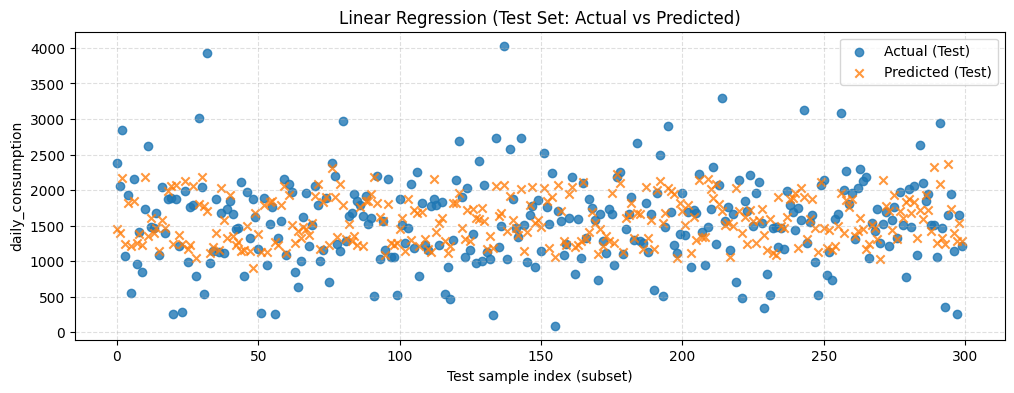


Model: Polynomial Regression (degree=2)

--- Fitted Model Equation (Top Terms) ---
daily_consumption = 2037.4142 (+165.5267) * AWND (-60.9740) * TMAX (-27.8962) * AWND^2 (+26.8325) * TMIN (-10.4820) * PRCP (-2.6130) * TMAX TMIN (-1.9368) * PRCP TMIN (+1.8505) * TMAX^2 (+1.5725) * PRCP TMAX (+1.2309) * AWND PRCP (+1.1693) * AWND TMIN (-1.0760) * AWND TMAX (+0.2939) * TMIN^2 (-0.0545) * PRCP^2


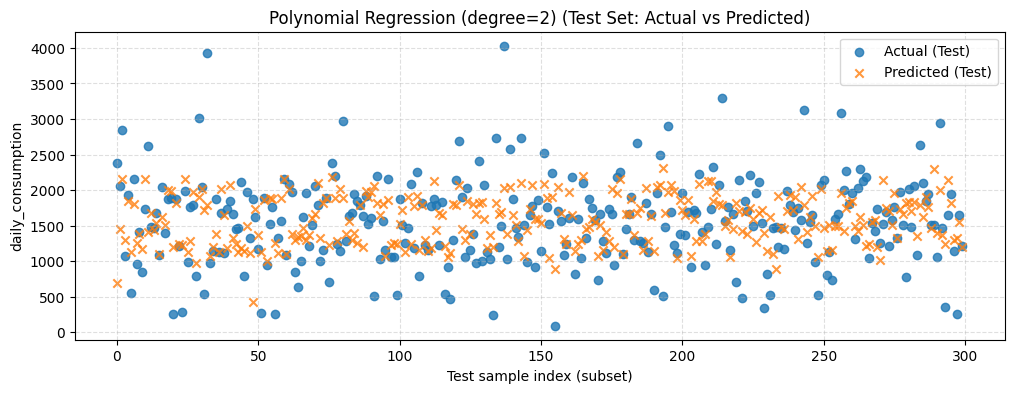


Model: Polynomial Regression (degree=3)

--- Fitted Model Equation (Top Terms) ---
daily_consumption = 1405.7630 (+509.9634) * AWND (-140.8094) * AWND^2 (+67.4216) * TMAX (-63.7983) * TMIN (+25.0565) * TMAX TMIN (-20.2281) * AWND TMIN (-13.9648) * TMIN^2 (-13.1044) * TMAX^2 (+9.3010) * PRCP (+7.8406) * AWND^3 (-4.9294) * AWND PRCP (+3.8559) * AWND^2 TMAX (+3.4853) * AWND TMAX TMIN (+2.2711) * AWND TMAX (-1.8669) * TMAX^2 TMIN
(Showing top 15 terms out of 34 total terms.)


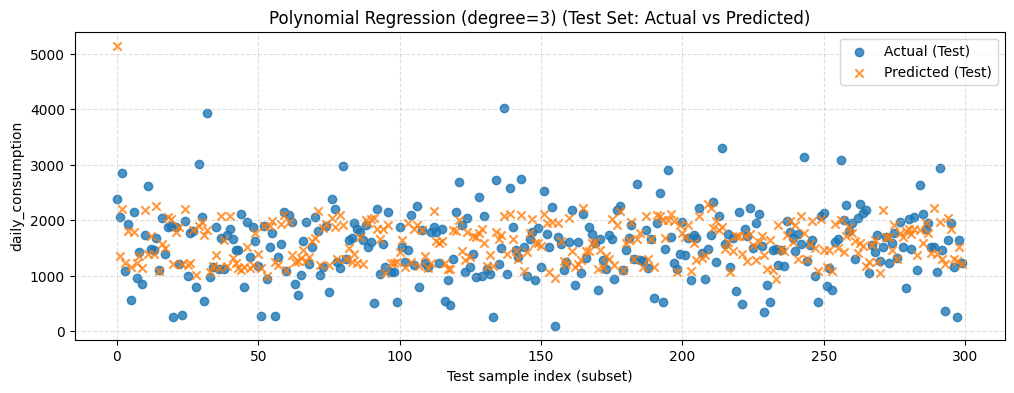


Model: Polynomial Regression (degree=4)

--- Fitted Model Equation (Top Terms) ---
daily_consumption = 1437.2413 (-416.4509) * AWND (-386.5721) * TMIN (+312.1157) * TMAX (+245.1996) * AWND^2 (+175.5947) * TMAX TMIN (+144.1717) * AWND TMAX (-110.1963) * AWND TMIN (-89.7729) * TMIN^2 (-83.0902) * AWND PRCP (-82.3475) * TMAX^2 (-63.0753) * AWND^2 TMAX (+58.6639) * AWND^2 TMIN (-41.9050) * AWND^3 (+26.1746) * AWND^2 PRCP (-25.1428) * AWND TMAX TMIN
(Showing top 15 terms out of 69 total terms.)


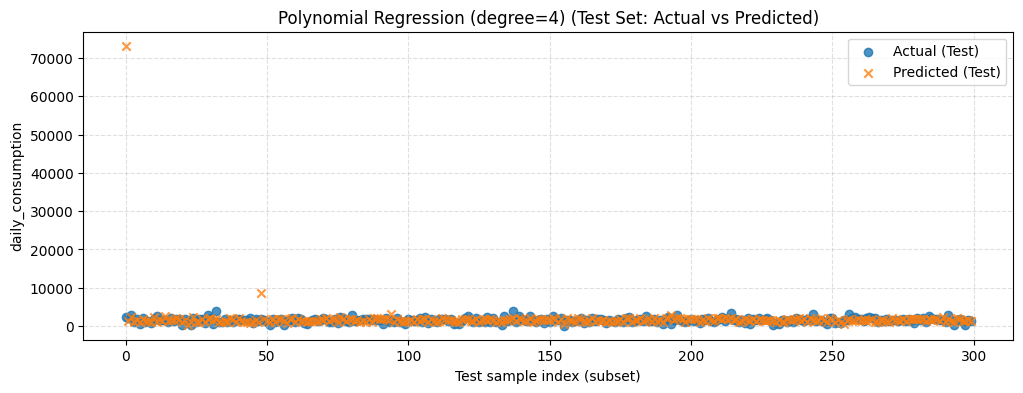

In [ ]:

# ============================================================
# Model Training
# ============================================================

df_no_extra = df.drop(columns=["date"]).copy()
# We will get rid of the "date" column becuase the relationship between "date" and "daily_consumption" should be near to 0.

results_A = run_models_and_evaluate(
    df_no_extra,
    degrees=(1, 2, 3, 4),
    show_equation=True,
    show_plots=True,
    top_k_terms=15
)




## 2.4 Comparative Model Evaluation Table (train & test)

In [ ]:
# ============================================================
# Display results from each model in a summary table
# ============================================================

display(results_A)

,Model,Train MSE,Train MAE,Train R^2,Test MSE,Test MAE,Test R^2,Train size,Test size
0,Linear Regression,272403.396174,384.465016,0.276000,2.481258e+05,375.404537,0.299333,992,426
1,Polynomial Regression (degree=2),264765.769932,379.648753,0.296300,2.552685e+05,379.039083,0.279163,992,426
2,Polynomial Regression (degree=3),259249.534870,375.952901,0.310961,2.656237e+05,385.235167,0.249922,992,426
3,Polynomial Regression (degree=4),251909.339001,372.116566,0.330470,1.215149e+07,578.642201,-33.313844,992,426


## 2.5  Discussion and Interpretation

Based on the evalutation statistics, we can see that none of the models truly performed well, or well enough, as supported by the fact that those models at most have a R² of 20%, no where near "good." For the frist three models - linear, poly second degree, and poly third degree - they appears to be underfitting given that they performed badly, with high errors and low R², but the discrepency between training and testing statistics is considered to be low, especially for polynomial second degree, where its Train MSE = 379.648753 and Test MSE = 379.039083, telling us that the models are not complex enough; where as the last model, polynomial thrid degree, appears to be overfitting as shown that its R² improved from the previous three underfitting model, however, there is a sharp difference/gap between training and testing metrics, namely its Train MSE = 372.116566 while Test MSE = 578.642201, meaning the model is not "remembering" anything from the training when being tested.

Regarding the possible reasons leading to low test performance among all those models above, limited features set and high-noise data may plays a role. Our dataset has four features - AWND, PRCP, TMAX, and TMIN. The weather prediction model will likely be more accurate with a greater number of features set. At the same time, our polynomial 3rd degree and 4th degree  models contains a DV (dependent variable) with outrageously high residual, located at x=0. This is likely the result of some high-noise data that can be traced back into the data set.

If we have to find the best out of the four, the linear regression model has the best generalization performance compared the rest, with a highest leading Test R² of 0.299333 and the lowest Test MSE of 375.404537. This tells us that the 29.9333% of the variance in the electricity consumption can be explained by the weather-to-consumption model.

Polynomial regression model, when comparing to linear, does not generally guarantee improved fit, per R², MSE, and MAE differences across the models.






